# Neural Networks - Gradient Descent

This colab notebook is an introduction to gradient descent technique with neural networks.

Gradient descent is a numerical technique to find function minimum. The main idea is to start at a random point and by small steps go towards opposite direction of gradient.

$$x_{new} = x_{old} - \alpha\nabla f(x)$$<br>
$$x \quad \text{is an input to f}$$<br>
$$\nabla f = [f'_{x_1},f'_{x_2},f'_{x_3},...]$$<br>
$$\alpha \quad \text{how big steps should we take to update the w-s (usually is called learning rate)}$$

![title](https://cdn-images-1.medium.com/max/1200/1*ZmzSnV6xluGa42wtU7KYVA.gif)

So if function has many local minimums gradient descent may get stuck on some local one.

![title](https://www.charlesbordet.com/assets/images/gradient-descent/gradientdescent-f3.gif)

In [0]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import value_and_grad
from scipy.optimize import minimize

Let's make some plots for the following function:
$$f(x,y)=5(1.5-x+xy)^2+(2.25-x+xy^2)^2+5(2.625-x+xy^3)^2$$

In [0]:
# define the function
f  = lambda x, y: 5*(1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + 5*(2.625 - x + x*y**3)**2

In [0]:
# define meshgrid boundaries and steps
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = f(x, y)

In [0]:
# find the minimum point
minima = np.array([3., .5])
minima_ = minima.reshape(-1, 1)

In [0]:
def make_minimize_cb(path=[]):
    
    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))

    return minimize_cb

In [48]:
# initial point
x0 = np.array([-2,1.1])
func = value_and_grad(lambda args: f(*args))
# initialize path for gradient descent
path_ = [x0]
path = np.array(path_).T
path.shape

(2, 1)

In [49]:
# perform newton method of optimization
res = minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-20, callback=make_minimize_cb(path_))
path = np.array(path_).T
# check shape, if the second dimension is high, will take long time
#path = path[:,:40] # limiting for computational reasons
path.shape

(2, 118)

### 2d animation

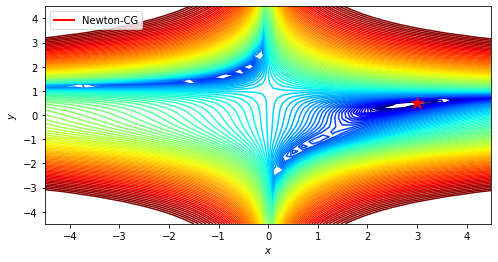

In [50]:
fig, ax = plt.subplots(figsize=(8, 4))

# countour plot
ax.contour(x, y, z, levels=np.logspace(0, 5, 100), norm=LogNorm(), cmap=plt.cm.jet)
# minima point plot
ax.plot(*minima_, 'r*', markersize=12)

# empty lists for gradient descend path
line, = ax.plot([], [], 'r', label='Newton-CG', lw=2)
point, = ax.plot([], [], 'ro')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')
plt.show()

In [0]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

In [52]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=120, 
                               repeat_delay=5, blit=True)

HTML(anim.to_html5_video())

### 3d animation

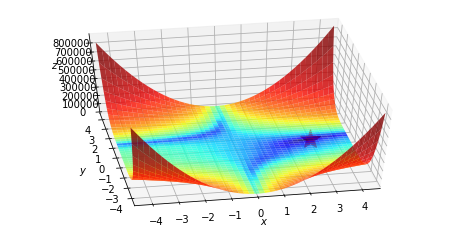

In [64]:
fig = plt.figure(figsize=(8, 4))
ax = plt.axes(projection='3d', elev=50, azim=-100)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=20)

line, = ax.plot([], [], [], 'r', label='Newton-CG', lw=2)
point, = ax.plot([], [], [], 'ro')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.show()

In [0]:
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

def animate(i):
    line.set_data(path[0,:i], path[1,:i])
    line.set_3d_properties(f(*path[::,:i]))
    point.set_data(path[0,i-1:i], path[1,i-1:i])
    point.set_3d_properties(f(*path[::,i-1:i]))
    return line, point

In [0]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=120, 
                               repeat_delay=5, blit=True)

In [56]:
HTML(anim.to_html5_video())

Code samples were mainly taken from this page http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/

In [0]:
import keras
from keras import backend as K 
import tensorflow as tf
from keras.layers import Dense,Input
from keras import Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from tqdm import tqdm_notebook as tqdm
import gc

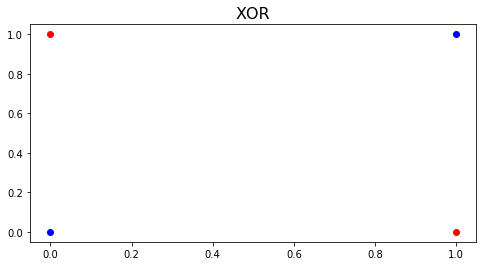

In [68]:
# Generate random data
x1 = np.array([0,0,1,1])
x2 = np.array([0,1,0,1])
x = np.array([x1,x2]).reshape(-1,2)
y = np.array([1 if (i<0.5 and j<0.5) or (i>0.5 and j>0.5) else 0 for (i,j) in zip(x1,x2)])

plt.figure(figsize = (8,4))
plt.plot(x1[np.where(y==1)],x2[np.where(y==1)],'bo')
plt.plot(x1[np.where(y==0)],x2[np.where(y==0)],'ro')
plt.title('XOR', fontsize = 16)
plt.show()
    

In [0]:
# NN architecture
input_layer = Input(shape = (2,), name = 'input_layer') # input layer
h1 = Dense(2,activation='sigmoid', name = 'hidden_layer1')(input_layer) # hidden layer 1
output = Dense(1, activation = 'sigmoid', name = 'output_layer')(h1)

model = Model(input_layer,output)
model.compile(optimizer='adam',loss = 'binary_crossentropy')

In [70]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 2)                 0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2)                 6         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


![title](https://quantmacro.files.wordpress.com/2015/08/31.jpg?w=748)

This neural network can be written as:
$$NN = \sigma(w_{31}\sigma(w_{11}x_1+w_{21}x_2+b_1)+w_{32}\sigma((w_{12}x_1+w_{22}x_2+b_2)+b_3)$$<br>
$$\sigma(x) =\frac{1}{1+e^{-x}} $$

As XOR is a classification problem we will use crossentropy and try to minimize it with respect to weights and biases.

$$CE = -\sum_i{y_ilog(NN_i)+(1-y_i)(log(1-NN_i))}$$

Let's calcualte the dervivative wrt $w_{31}$

$$CE'_{w_{31}} = -\sum_i{\frac{y_i-NN_i}{NN_i(1-NN_i)}NN'_i}$$<br>
$$CE'_{w_{31}} = -\sum_i{\frac{y_i-NN_i}{NN_i(1-NN_i)}(\sigma(w_{31}h_1+w_{32}h_2+b_3))'}$$<br>
$$CE'_{w_{31}} = -\sum_i{\frac{y_i-NN_i}{NN_i(1-NN_i)}NN_i(1-NN_i)h_1}$$<br>
$$CE'_{w_{31}} = -\sum_i{(y_i-NN_i)h_1}$$<br>

So for $w_{31}$ the update would look like this:
$$w_{31}^{new} = w_{31}^{old} + \alpha \sum_i{(y_i-NN_i)h_1}$$

Now let's calculate the derviative for $w_{11}$

$$CE'_{w_{11}} = -\sum_i{\frac{y_i-NN_i}{NN_i(1-NN_i)}NN'_i}$$<br>
$$CE'_{w_{11}} = -\sum_i{\frac{y_i-NN_i}{NN_i(1-NN_i)}(\sigma(w_{31}h_{1}+w_{32}h_{2}+b_3))'}$$<br>
$$CE'_{w_{11}} = -\sum_i{\frac{y_i-NN_i}{NN_i(1-NN_i)}NN_i(1-NN_i)(w_{31}h_{1}+w_{32}h_{2}+b_3)'}$$<br>
$$CE'_{w_{11}} = -\sum_i{(y_i-NN_i)(w_{31}h_{1}+w_{32}h_{2})'}$$<br>
$$CE'_{w_{11}} = -\sum_i{(y_i-NN_i)(w_{31}h'_{1})}$$<br>
$$CE'_{w_{11}} =  -\sum_i{(y_i-NN_i)w_{31}h_{1}(1-h_{1})x_1}$$

We can see that the weight change for the first layers is some kind of weighted sum of derivatives in hidden layer plus the the change we calculated before now we perform same kind of calculataion for hidden nodes.

So for $w_{11}$ the update would look like this:
$$w_{11}^{new} = w_{11}^{old} + \alpha\sum_i{(y_i-NN_i)w_{31}h_{1}(1-h_{1})x_1}$$

Usually full gradient descent is not applicable. Data could be very large and we won't have enough memory to laod alld at for gradient calculation. Another reason is that in practice full gradient descent also gets stuck in local minima. These problems are addressed min stochastic gradient descent and mini-batch gradient descent.

With SGD for $w_{11}$ the update would look like this:<br>
$\text{for i in X:}$<br>
$\quad w_{11}^{new} = w_{11}^{old} + \alpha (y_i-NN_i)w_{31}h_{1i}(1-h_{1i})x_{1i}$


With mini-batches for $w_{11}$ the update would look like this:<br>
$\text{divide your data into batches of size k (usually power of 2 like 64 or 128)}$<br>
$\text{for batch in batches:}$<br>
$\quad w_{11}^{new} = w_{11}^{old} + \alpha \sum\limits_{i \in batch}{(y_i-NN_i)w_{31}h_{1i}(1-h_{1i})x_{1i}}$


Now let's fit a model

In [71]:
# fitting model
model.fit(x,y,epochs=100,verbose = 1,batch_size=3)

Epoch 1/100
4/4 [==============================] - 0s 50ms/step - loss: 0.8917
Epoch 2/100
4/4 [==============================] - 0s 894us/step - loss: 0.8909
Epoch 3/100
4/4 [==============================] - 0s 856us/step - loss: 0.8892
Epoch 4/100
4/4 [==============================] - 0s 866us/step - loss: 0.8880
Epoch 5/100
4/4 [==============================] - 0s 797us/step - loss: 0.8874
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8857
Epoch 7/100
4/4 [==============================] - 0s 971us/step - loss: 0.8851
Epoch 8/100
4/4 [==============================] - 0s 883us/step - loss: 0.8840
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8830
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8821
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8813
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8806
Epoch 13/100
4/4 [==============================

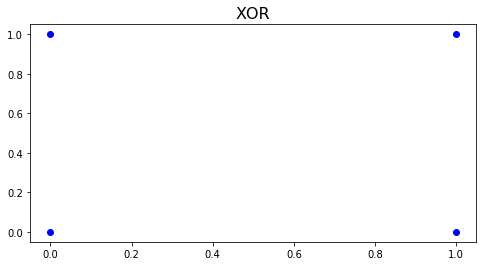

In [72]:
preds = (model.predict(x)>0.5).reshape(1,-1)[0]
plt.figure(figsize = (8,4))
plt.plot(x1[np.where(preds==True)],x2[np.where(preds==True)],'bo')
plt.plot(x1[np.where(preds==False)],x2[np.where(preds==False)],'ro')
plt.title('XOR', fontsize = 16)
plt.show()

### Exercise 

Download MNIST dataset here http://yann.lecun.com/exdb/mnist/. Construct Neural Network on it. Try different architectures (number of layers, neurons)